<a href="https://colab.research.google.com/github/forMwish/MyDeepLearn/blob/master/IMDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 数据预处理

In [1]:
from keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

17465344/17464789 [==============================] - 0s 0us/step


<string>:6: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/datasets/imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 

In [2]:
import numpy as np

def one_hot(sequences, dimension=10000):
  result = np.zeros((len(sequences), dimension))
  for i, data in enumerate(sequences):
    result[i, data] = 1.
  return result

train_x = one_hot(train_data, 10000)
test_x = one_hot(test_data, 10000)
train_y = np.asarray(train_labels).astype('float32')
test_y = np.asarray(test_labels).astype('float32')

# 2. 模型构建

In [3]:
from keras import layers
from keras import models

model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                160016    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                272       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 160,305
Trainable params: 160,305
Non-trainable params: 0
_________________________________________________________________


In [4]:
from keras import losses
from keras import metrics
from keras import optimizers

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
       loss=losses.binary_crossentropy,
       metrics=metrics.binary_accuracy)

# 3. 训练

In [5]:
x_val = train_x[0:10000]
partial_train_x = train_x[10000:]

y_val = train_y[0:10000]
partial_train_y = train_y[10000:]

history = model.fit(partial_train_x,
            partial_train_y,
            epochs=20,
            batch_size=512,
            validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 3s 65ms/step - loss: 0.6020 - binary_accuracy: 0.6955 - val_loss: 0.4074 - val_binary_accuracy: 0.8634
Epoch 2/20
30/30 [==============================] - 1s 38ms/step - loss: 0.3464 - binary_accuracy: 0.8937 - val_loss: 0.3187 - val_binary_accuracy: 0.8795
Epoch 3/20
30/30 [==============================] - 1s 38ms/step - loss: 0.2457 - binary_accuracy: 0.9215 - val_loss: 0.2840 - val_binary_accuracy: 0.8898
Epoch 4/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1867 - binary_accuracy: 0.9406 - val_loss: 0.2739 - val_binary_accuracy: 0.8906
Epoch 5/20
30/30 [==============================] - 1s 39ms/step - loss: 0.1441 - binary_accuracy: 0.9568 - val_loss: 0.2781 - val_binary_accuracy: 0.8897
Epoch 6/20
30/30 [==============================] - 1s 38ms/step - loss: 0.1223 - binary_accuracy: 0.9617 - val_loss: 0.2884 - val_binary_accuracy: 0.8858
Epoch 7/20
30/30 [==============================] - 1s 38ms/step - los

# 4. 验证

In [6]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive


Mounted at /gdrive
/gdrive


In [7]:
np.save("/gdrive/MyDrive/train_history/history_imdb", history.history)

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


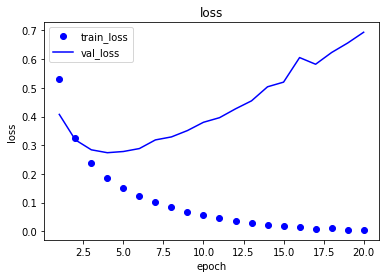

In [6]:
print(history.history.keys())

import matplotlib.pyplot as plt

history_dict = history.history
train_loss = history_dict['loss']
train_acc = history_dict['binary_accuracy']
val_loss = history_dict['val_loss']
val_acc = history_dict['val_binary_accuracy']

epoch = range(1, len(train_loss) + 1)
plt.plot(epoch, train_loss, 'bo', label="train_loss")
plt.plot(epoch, val_loss, 'b', label="val_loss")
plt.title('loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.show()

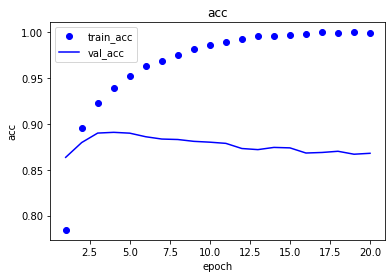

In [7]:
epoch = range(1, len(train_loss) + 1)
plt.plot(epoch, train_acc, 'bo', label="train_acc")
plt.plot(epoch, val_acc, 'b', label="val_acc")
plt.title('acc')
plt.xlabel('epoch')
plt.ylabel('acc')
plt.legend()

plt.show()

# 5. 测试

In [10]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=0.001),
       loss=losses.binary_crossentropy,
       metrics=metrics.binary_accuracy)

model.fit(train_x, train_y, epochs=4, batch_size=512)
results = model.evaluate(test_x, test_y)
print(results)

Epoch 1/4
49/49 [==============================] - 2s 33ms/step - loss: 0.5331 - binary_accuracy: 0.7548
Epoch 2/4
49/49 [==============================] - 2s 32ms/step - loss: 0.2687 - binary_accuracy: 0.9112
Epoch 3/4
49/49 [==============================] - 2s 33ms/step - loss: 0.2015 - binary_accuracy: 0.9329
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.2918 - binary_accuracy: 0.8842
[0.2918042838573456, 0.8841999769210815]


In [11]:
model.predict(test_x)

array([[0.17246598],
       [0.99882317],
       [0.8666438 ],
       ...,
       [0.098665  ],
       [0.07640839],
       [0.6199232 ]], dtype=float32)